In [ ]:
# Uncomment the code below if you dont have this packages 
#! pip install plotly
#! pip install wordcloud

In [1]:
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# for analyzing and cleaning text 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer

#for convering word to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Ml Model
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
nltk.download()

In [2]:
set_of_stopwords = set(stopwords.words('english'))

In [3]:
df = pd.read_csv('mbti.csv')

In [4]:
df

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [5]:
df.isnull().any()

type     False
posts    False
dtype: bool

In [6]:
df.describe(include=['object'])

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [7]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [8]:
len(types)

16

In [9]:
px.pie(df,names='type',title='Personality type')

In [10]:
dis_personality_indicator = {}
dis_personality_indicator['I'] = 0
dis_personality_indicator['E'] = 0
dis_personality_indicator['N'] = 0
dis_personality_indicator['S'] = 0
dis_personality_indicator['T'] = 0
dis_personality_indicator['F'] = 0
dis_personality_indicator['J'] = 0
dis_personality_indicator['P'] = 0

In [11]:
for i in df['type']:
    for j in i:
        dis_personality_indicator[j]=dis_personality_indicator[j]+1

In [12]:
dis_personality_indicator

{'I': 6676,
 'E': 1999,
 'N': 7478,
 'S': 1197,
 'T': 3981,
 'F': 4694,
 'J': 3434,
 'P': 5241}

In [13]:
list_personlity_indicator = ["I/E","I/E","N/S","N/S","T/F","T/F","J/P","J/P"]
list_split = ['I','E','N','S','T','F','J','P']
list_count = []
for i in list_split:
    list_count.append(dis_personality_indicator[i])

In [14]:
data = pd.DataFrame.from_dict({'personlity_indicator':list_personlity_indicator,'split': list_split,'count': list_count})

In [15]:
df.shape

(8675, 2)

In [16]:
def percentange(x):
    return (x/8675)*100

In [17]:
data['Percentage'] = data['count'].apply(lambda x: percentange(x))
data['Percentage'] = data['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x))

In [18]:
data

personlity_indicator split  count Percentage
0                  I/E     I   6676     76.96%
1                  I/E     E   1999     23.04%
2                  N/S     N   7478     86.20%
3                  N/S     S   1197     13.80%
4                  T/F     T   3981     45.89%
5                  T/F     F   4694     54.11%
6                  J/P     J   3434     39.59%
7                  J/P     P   5241     60.41%

In [19]:
px.bar(data, x='personlity_indicator', y=['count'],color='split',text='Percentage')

In [20]:
eda_df = df

In [21]:
eda_df['No of Posts'] = eda_df['posts'].apply(lambda x: len(x.split("|||")))

In [22]:
eda_df

type                                              posts  No of Posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           50
1     ENTP  'I'm finding the lack of me in these posts ver...           50
2     INTP  'Good one  _____   https://www.youtube.com/wat...           50
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...           50
4     ENTJ  'You're fired.|||That's another silly misconce...           50
...    ...                                                ...          ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...           50
8671  ENFP  'So...if this thread already exists someplace ...           50
8672  INTP  'So many questions when i do these things.  I ...           50
8673  INFP  'I am very conflicted right now when it comes ...           50
8674  INFP  'It has been too long since I have been on per...           50

[8675 rows x 3 columns]

In [23]:
eda_df['No of Posts'].unique()

array([50, 43, 49, 28, 48, 42, 58, 30, 32, 47, 35, 29, 34, 38, 18, 45, 27,
       12, 23, 59, 53, 56, 36, 46, 44, 21, 63, 33, 10, 66, 37, 14, 39, 25,
       40, 15,  8, 57, 20, 41,  1, 62, 69, 19, 79, 16, 70, 75, 31, 51, 24,
       83,  7, 26, 80, 64, 68, 61, 72, 52, 60, 22,  9, 17, 13, 71, 11,  2,
        4, 67, 54, 78, 77, 89,  5, 73, 74], dtype=int64)

In [24]:
eda_df['posts'][3]

"'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP,  Your absolute admiration of me is refreshing. You're a great girlfriend and I wish we both 

In [25]:
len(re.findall(r'https?:\/\/.*?[\s+]', eda_df['posts'][0]))

18

In [26]:
eda_df['No of url'] = eda_df['posts'].apply(lambda x: len(re.findall(r'https?:\/\/.*?[\s+]', x)))

In [27]:
px.violin(eda_df,x='type', y="No of Posts")

In [28]:
eda_df

type                                              posts  No of Posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           50   
1     ENTP  'I'm finding the lack of me in these posts ver...           50   
2     INTP  'Good one  _____   https://www.youtube.com/wat...           50   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...           50   
4     ENTJ  'You're fired.|||That's another silly misconce...           50   
...    ...                                                ...          ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...           50   
8671  ENFP  'So...if this thread already exists someplace ...           50   
8672  INTP  'So many questions when i do these things.  I ...           50   
8673  INFP  'I am very conflicted right now when it comes ...           50   
8674  INFP  'It has been too long since I have been on per...           50   

      No of url  
0            18  
1             8  
2             4  
3             2  
4             5  
...         ...  
8670          7  
8671          2  
8672          2  
8673          0  
8674          3  

[8675 rows x 4 columns]

In [29]:
eda_df['No of url'].unique()

array([18,  8,  4,  2,  5,  1, 17,  7,  3,  0, 12, 22,  9,  6, 10, 25, 11,
       19, 15, 13, 16, 14, 20, 44, 70, 21, 32, 31, 23, 41, 27, 24, 42, 49,
       28, 29, 36, 26, 35, 43, 34, 33, 57, 30], dtype=int64)

In [30]:
px.box(eda_df,x='type', y="No of url")

In [31]:
eda_df['clean_posts'] = eda_df['posts'].apply(lambda sentence: sentence.lower())
eda_df['clean_posts'] = eda_df['clean_posts'].apply(lambda sentence: re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence))
eda_df['clean_posts'] = eda_df['clean_posts'].apply(lambda sentence: re.sub('[^a-z]',' ',sentence))

In [32]:
eda_df

type                                              posts  No of Posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           50   
1     ENTP  'I'm finding the lack of me in these posts ver...           50   
2     INTP  'Good one  _____   https://www.youtube.com/wat...           50   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...           50   
4     ENTJ  'You're fired.|||That's another silly misconce...           50   
...    ...                                                ...          ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...           50   
8671  ENFP  'So...if this thread already exists someplace ...           50   
8672  INTP  'So many questions when i do these things.  I ...           50   
8673  INFP  'I am very conflicted right now when it comes ...           50   
8674  INFP  'It has been too long since I have been on per...           50   

      No of url                                        clean_posts  
0            18     and intj moments     sportscenter not top t...  
1             8   i m finding the lack of me in these posts ver...  
2             4   good one            course  to which i say i ...  
3             2   dear intp    i enjoyed our conversation the o...  
4             5   you re fired    that s another silly misconce...  
...         ...                                                ...  
8670          7     just because i always think of cats as fi d...  
8671          2   so   if this thread already exists someplace ...  
8672          2   so many questions when i do these things   i ...  
8673          0   i am very conflicted right now when it comes ...  
8674          3   it has been too long since i have been on per...  

[8675 rows x 5 columns]

In [33]:
eda_df['No of words']=eda_df['clean_posts'].apply(lambda x: len(word_tokenize(x)))

In [34]:
eda_df

type                                              posts  No of Posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           50   
1     ENTP  'I'm finding the lack of me in these posts ver...           50   
2     INTP  'Good one  _____   https://www.youtube.com/wat...           50   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...           50   
4     ENTJ  'You're fired.|||That's another silly misconce...           50   
...    ...                                                ...          ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...           50   
8671  ENFP  'So...if this thread already exists someplace ...           50   
8672  INTP  'So many questions when i do these things.  I ...           50   
8673  INFP  'I am very conflicted right now when it comes ...           50   
8674  INFP  'It has been too long since I have been on per...           50   

      No of url                                        clean_posts  \
0            18     and intj moments     sportscenter not top t...   
1             8   i m finding the lack of me in these posts ver...   
2             4   good one            course  to which i say i ...   
3             2   dear intp    i enjoyed our conversation the o...   
4             5   you re fired    that s another silly misconce...   
...         ...                                                ...   
8670          7     just because i always think of cats as fi d...   
8671          2   so   if this thread already exists someplace ...   
8672          2   so many questions when i do these things   i ...   
8673          0   i am very conflicted right now when it comes ...   
8674          3   it has been too long since i have been on per...   

      No of words  
0             582  
1            1249  
2             880  
3            1145  
4            1036  
...           ...  
8670          866  
8671         1463  
8672         1008  
8673         1811  
8674         1416  

[8675 rows x 6 columns]

In [35]:
px.box(eda_df,x='type', y="No of words")

In [36]:
def no_of_stopwords(x):
    c = 0
    for i in word_tokenize(x):
        if i in set_of_stopwords:
            c=c+1
    return c

In [37]:
eda_df['No of stopwords']=eda_df['clean_posts'].apply(lambda x: no_of_stopwords(x))

In [38]:
px.box(eda_df,x='type', y="No of stopwords")

In [39]:
def remove_stopswords(series,set_of_stopwords):
    removed_stopswords = []
    for i in series:
        words = nltk.word_tokenize(i)
        words = [word for word in words if word not in set_of_stopwords and len(word)>2]
        removed_stopswords.append(' '.join(words))
          
    return removed_stopswords

In [40]:
eda_df['removed_stopswords']=remove_stopswords(eda_df['clean_posts'],set_of_stopwords)

In [41]:
eda_df

type                                              posts  No of Posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           50   
1     ENTP  'I'm finding the lack of me in these posts ver...           50   
2     INTP  'Good one  _____   https://www.youtube.com/wat...           50   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...           50   
4     ENTJ  'You're fired.|||That's another silly misconce...           50   
...    ...                                                ...          ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...           50   
8671  ENFP  'So...if this thread already exists someplace ...           50   
8672  INTP  'So many questions when i do these things.  I ...           50   
8673  INFP  'I am very conflicted right now when it comes ...           50   
8674  INFP  'It has been too long since I have been on per...           50   

      No of url                                        clean_posts  \
0            18     and intj moments     sportscenter not top t...   
1             8   i m finding the lack of me in these posts ver...   
2             4   good one            course  to which i say i ...   
3             2   dear intp    i enjoyed our conversation the o...   
4             5   you re fired    that s another silly misconce...   
...         ...                                                ...   
8670          7     just because i always think of cats as fi d...   
8671          2   so   if this thread already exists someplace ...   
8672          2   so many questions when i do these things   i ...   
8673          0   i am very conflicted right now when it comes ...   
8674          3   it has been too long since i have been on per...   

      No of words  No of stopwords  \
0             582              280   
1            1249              689   
2             880              454   
3            1145              622   
4            1036              557   
...           ...              ...   
8670          866              467   
8671         1463              839   
8672         1008              522   
8673         1811             1042   
8674         1416              806   

                                     removed_stopswords  
0     intj moments sportscenter top ten plays pranks...  
1     finding lack posts alarming sex boring positio...  
2     good one course say know blessing curse absolu...  
3     dear intp enjoyed conversation day esoteric ga...  
4     fired another silly misconception approaching ...  
...                                                 ...  
8670  always think cats doms reason websites become ...  
8671  thread already exists someplace else heck dele...  
8672  many questions things would take purple pill p...  
8673  conflicted right comes wanting children honest...  
8674  long since personalitycafe although seem chang...  

[8675 rows x 8 columns]

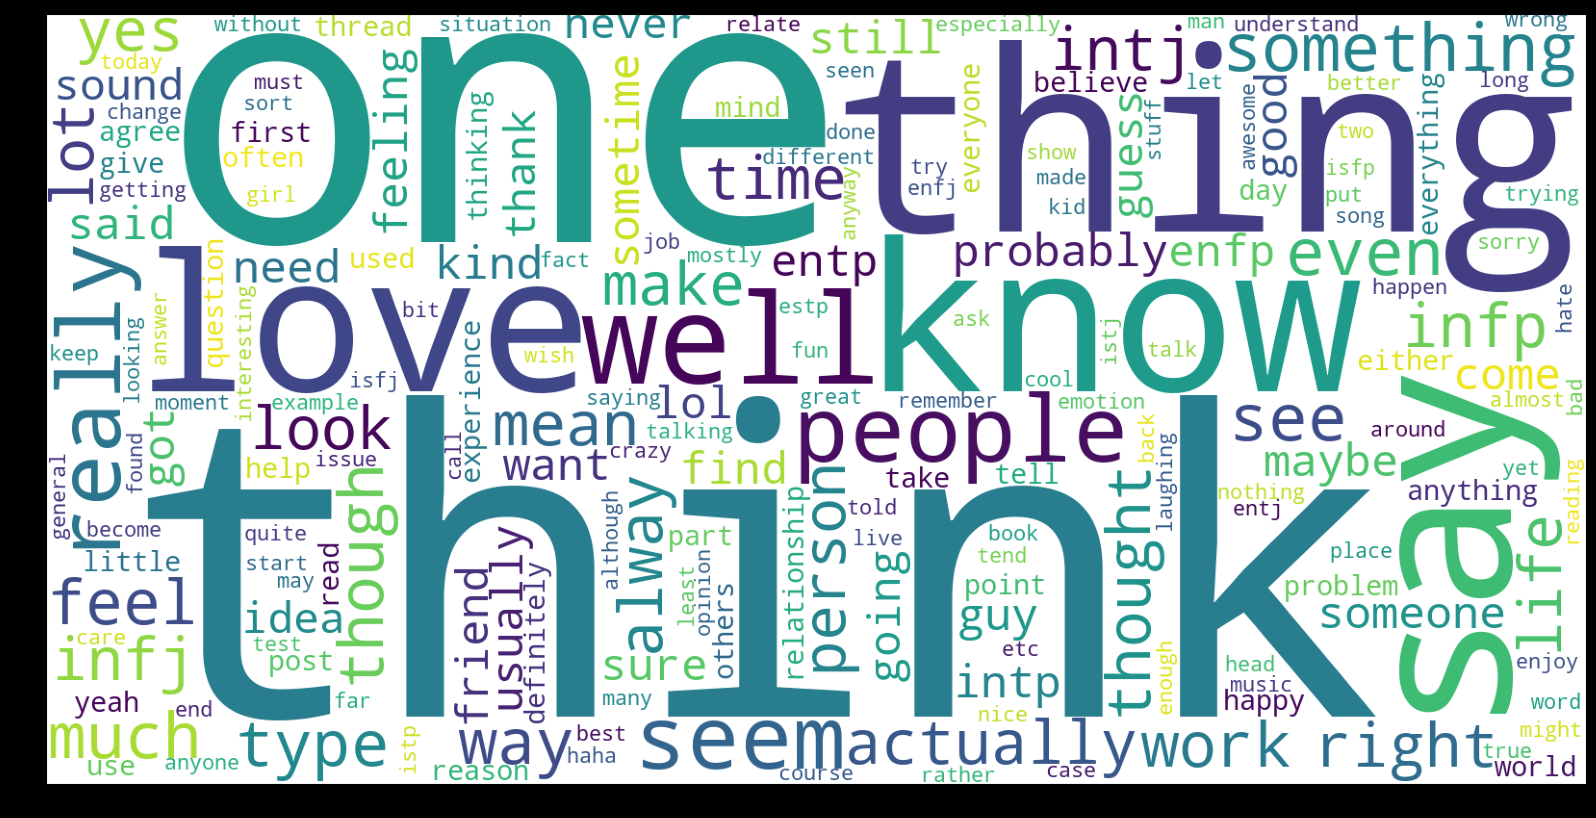

In [42]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(eda_df['removed_stopswords'].tolist ())) 
plt.figure( figsize=(20,10), facecolor='k') 
plt.imshow (wordcloud)

In [43]:
lis = [list(eda_df['type']),list(eda_df['removed_stopswords'])]

In [44]:
dis = {}
types = np.unique(np.array(df['type']))
for i in types:
    dis[i] = ""

In [45]:
for i in range(0,len(lis[0])):
    dis[lis[0][i]] = dis[lis[0][i]]+" "+lis[1][i]

C:\Users\piyus\AppData\Local\Temp\ipykernel_3788\3615675968.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



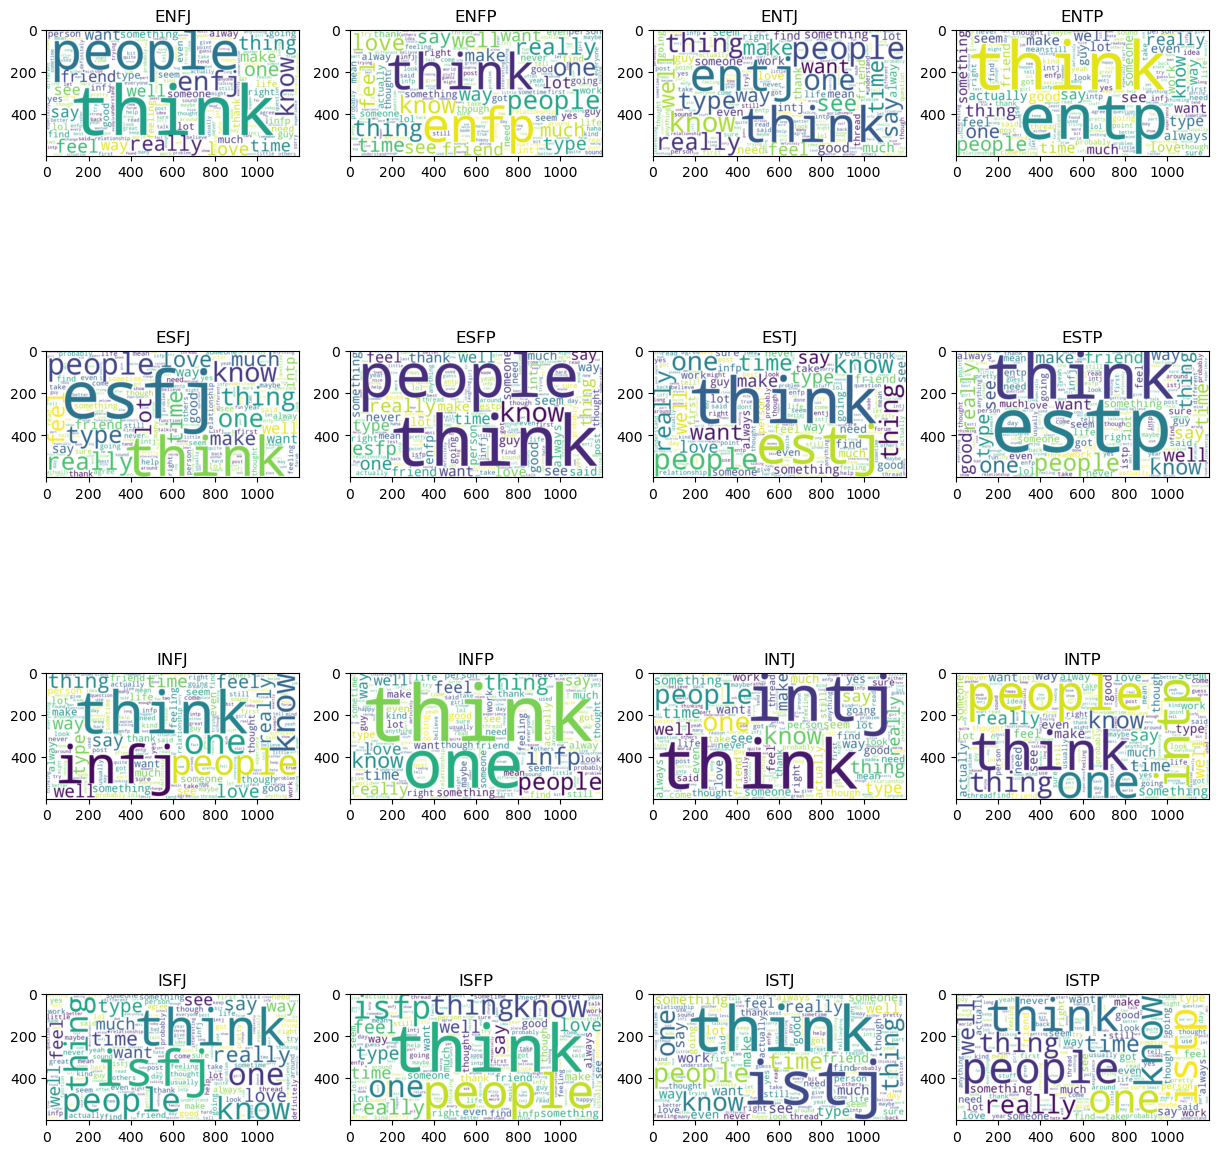

In [46]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0

for i in np.unique(np.array(df['type'])):
    wordcloud = WordCloud(background_color="white",width=1200, height=600).generate(dis[i]) 
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [47]:
for i in np.unique(np.array(df['type'])):
    set_of_stopwords.add(i.lower())

In [48]:
eda_df['removed_stopswords']=remove_stopswords(eda_df['removed_stopswords'],set_of_stopwords)

In [49]:
df['posts'] = df['posts'].apply(lambda sentence: sentence.lower())
df['posts'] = df['posts'].apply(lambda sentence: re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence))
df['posts'] = df['posts'].apply(lambda sentence: re.sub('[^a-z]',' ',sentence))

In [50]:
# df['posts'] = remove_stopswords(df['posts'],set_of_stopwords)

In [51]:
def get_types(row):
    t = row['type']
    ## IE
    I = 1 if t[0] == 'I' else 0 
    ## NS
    N = 1 if t[1] == 'N' else 0 
    ## TF
    T = 1 if t[2] == 'T' else 0 
    ## JP
    J = 1 if t[3] == 'J' else 0 

    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data_new = df.join(df.apply (lambda row: get_types (row),axis=1))

In [52]:
data_new.shape

(8675, 12)

In [53]:
data_new

type                                              posts  No of Posts  \
0     INFJ     and intj moments     sportscenter not top t...           50   
1     ENTP   i m finding the lack of me in these posts ver...           50   
2     INTP   good one            course  to which i say i ...           50   
3     INTJ   dear intp    i enjoyed our conversation the o...           50   
4     ENTJ   you re fired    that s another silly misconce...           50   
...    ...                                                ...          ...   
8670  ISFP     just because i always think of cats as fi d...           50   
8671  ENFP   so   if this thread already exists someplace ...           50   
8672  INTP   so many questions when i do these things   i ...           50   
8673  INFP   i am very conflicted right now when it comes ...           50   
8674  INFP   it has been too long since i have been on per...           50   

      No of url                                        clean_posts  \
0            18     and intj moments     sportscenter not top t...   
1             8   i m finding the lack of me in these posts ver...   
2             4   good one            course  to which i say i ...   
3             2   dear intp    i enjoyed our conversation the o...   
4             5   you re fired    that s another silly misconce...   
...         ...                                                ...   
8670          7     just because i always think of cats as fi d...   
8671          2   so   if this thread already exists someplace ...   
8672          2   so many questions when i do these things   i ...   
8673          0   i am very conflicted right now when it comes ...   
8674          3   it has been too long since i have been on per...   

      No of words  No of stopwords  \
0             582              280   
1            1249              689   
2             880              454   
3            1145              622   
4            1036              557   
...           ...              ...   
8670          866              467   
8671         1463              839   
8672         1008              522   
8673         1811             1042   
8674         1416              806   

                                     removed_stopswords  IE  NS  TF  JP  
0     moments sportscenter top ten plays pranks life...   1   1   0   1  
1     finding lack posts alarming sex boring positio...   0   1   1   0  
2     good one course say know blessing curse absolu...   1   1   1   0  
3     dear enjoyed conversation day esoteric gabbing...   1   1   1   1  
4     fired another silly misconception approaching ...   0   1   1   1  
...                                                 ...  ..  ..  ..  ..  
8670  always think cats doms reason websites become ...   1   0   0   0  
8671  thread already exists someplace else heck dele...   0   1   0   0  
8672  many questions things would take purple pill p...   1   1   1   0  
8673  conflicted right comes wanting children honest...   1   1   0   0  
8674  long since personalitycafe although seem chang...   1   1   0   0  

[8675 rows x 12 columns]

In [54]:
train_data,test_data=train_test_split(data_new,test_size=0.2,random_state=42,stratify=data_new.type)

In [55]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [56]:
vectorizer=TfidfVectorizer(max_features=10000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



TfidfVectorizer(max_features=10000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000028C7D8CB4C0>)

In [57]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [58]:
dis = {}

In [59]:
train_data

type                                              posts  No of Posts  \
8331  INFP   this is actually exactly what i expected    l...           72   
1290  ISTP   nope   not now  not ever   i m too busy with ...           50   
1982  ENFJ   yes peace is the absence of conflict   your i...           50   
769   INFP   i apologize for the delayed response  but tha...           50   
8339  INFP   nightglow  i can t even imagine what you must...           47   
...    ...                                                ...          ...   
4273  INFP   i m annoyed   i m sick of negative associatio...           50   
2698  INFP   my dad just told me that he loved me for i th...           50   
7435  ENTJ   i have dated a few infjs  including my curren...           50   
1843  INTP   people who are unable to replace social norms...           27   
2530  ENTP   yep  you re right  i agree with you   i think...           50   

      No of url                                        clean_posts  \
8331          0   this is actually exactly what i expected    l...   
1290          2   nope   not now  not ever   i m too busy with ...   
1982          0   yes peace is the absence of conflict   your i...   
769           1   i apologize for the delayed response  but tha...   
8339          3   nightglow  i can t even imagine what you must...   
...         ...                                                ...   
4273          1   i m annoyed   i m sick of negative associatio...   
2698          4   my dad just told me that he loved me for i th...   
7435          2   i have dated a few infjs  including my curren...   
1843          0   people who are unable to replace social norms...   
2530          2   yep  you re right  i agree with you   i think...   

      No of words  No of stopwords  \
8331         1617              892   
1290         1288              651   
1982         1257              621   
769          1456              801   
8339         1619              910   
...           ...              ...   
4273         1645              914   
2698         1633              892   
7435         1324              683   
1843          708              388   
2530         1743              966   

                                     removed_stopswords  IE  NS  TF  JP  
8331  actually exactly expected laughing introversio...   1   1   0   0  
1290  nope ever busy work causes adrenaline rush act...   1   0   1   0  
1982  yes peace absence conflict friend suxx hardd i...   0   1   0   1  
769   apologize delayed response thank taking time s...   1   1   0   0  
8339  nightglow even imagine must struggling right d...   1   1   0   0  
...                                                 ...  ..  ..  ..  ..  
4273  annoyed sick negative associations uncontrolle...   1   1   0   0  
2698  dad told loved think first time life mean said...   1   1   0   0  
7435  dated infjs including current partner years pr...   0   1   1   1  
1843  people unable replace social norms rational ef...   1   1   1   0  
2530  yep right agree think seeking pressure relevan...   0   1   1   0  

[6940 rows x 12 columns]

In [60]:
model_acc = {}
list_of_train_target = [train_data.IE,train_data.NS,train_data.TF,train_data.JP]
list_of_test_target = [test_data.IE,test_data.NS,test_data.TF,test_data.JP]

In [61]:
IE_acc = []
NS_acc = []
TF_acc = []
JP_acc = []


list_model_name=  ['Stochastic Gradient Descent Classifier',
                    'Support vector machine',
                   'Logistic Regression' ,
                   'Multinomial NB',
                   'Random Forest Classifier',
                   'KNeighbors Classifier']


# IE

In [62]:
list_model = [SGDClassifier(loss= 'hinge', max_iter= 10000, penalty= 'l1'),
              SVC(cache_size= 10000,gamma= 'scale'),
              LogisticRegression(dual= False, max_iter= 100, penalty= 'l2'),
              MultinomialNB(),
              RandomForestClassifier(max_depth=50),
              KNeighborsClassifier( algorithm= 'auto', n_jobs= None, weights= 'uniform')]

for i in range(0,6):
    model = list_model[i]
    print(model)
    
    model.fit(train_post,list_of_train_target[0])
    predicted_value = model.predict(test_post)
    acc = accuracy_score(list_of_test_target[0],predicted_value)*100
    IE_acc.append(acc)

SGDClassifier(max_iter=10000, penalty='l1')
SVC(cache_size=10000)
LogisticRegression()
MultinomialNB()
RandomForestClassifier(max_depth=50)
KNeighborsClassifier()


# NS

In [63]:
list_model = [SGDClassifier(max_iter=10000, penalty='l1'),
              SVC(cache_size= 10000,gamma= 'scale'),
              LogisticRegression(dual= False, max_iter= 100, penalty= 'l2'),
              MultinomialNB(),
              RandomForestClassifier(max_depth=50),
              KNeighborsClassifier( algorithm= 'auto', n_jobs= None, weights= 'uniform')]

for i in range(0,6):
    model = list_model[i]
    print(model)
    
    model.fit(train_post,list_of_train_target[1])
    predicted_value = model.predict(test_post)
    acc = accuracy_score(list_of_test_target[1],predicted_value)*100
    NS_acc.append(acc)

SGDClassifier(max_iter=10000, penalty='l1')
SVC(cache_size=10000)
LogisticRegression()
MultinomialNB()
RandomForestClassifier(max_depth=50)
KNeighborsClassifier()


# TF

In [64]:
list_model = [SGDClassifier(loss= 'log', penalty= 'l1'),
              SVC(cache_size= 10000),
              LogisticRegression(),
              MultinomialNB(),
              RandomForestClassifier(max_depth=50),
              KNeighborsClassifier( algorithm= 'auto', n_jobs= None, weights= 'uniform')]

for i in range(0,6):
    model = list_model[i]
    print(model)
    
    model.fit(train_post,list_of_train_target[2])
    predicted_value = model.predict(test_post)
    acc = accuracy_score(list_of_test_target[2],predicted_value)*100
    TF_acc.append(acc)

SGDClassifier(loss='log', penalty='l1')


C:\Users\piyus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



SVC(cache_size=10000)
LogisticRegression()
MultinomialNB()
RandomForestClassifier(max_depth=50)
KNeighborsClassifier()


# JP

In [65]:
list_model = [SGDClassifier(loss= 'log', max_iter= 10000, penalty= 'l1'),
              SVC(cache_size= 10000),
              LogisticRegression(),
              MultinomialNB(),
              RandomForestClassifier(max_depth=50),
              KNeighborsClassifier( algorithm= 'auto', n_jobs= None, weights= 'uniform')]

for i in range(0,6):
    model = list_model[i]
    print(model)
    
    model.fit(train_post,list_of_train_target[3])
    predicted_value = model.predict(test_post)
    acc = accuracy_score(list_of_test_target[3],predicted_value)*100
    JP_acc.append(acc)

SGDClassifier(loss='log', max_iter=10000, penalty='l1')


C:\Users\piyus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



SVC(cache_size=10000)
LogisticRegression()
MultinomialNB()
RandomForestClassifier(max_depth=50)
KNeighborsClassifier()


In [66]:
dis_acc = {'Model': list_model_name, 'I/E': IE_acc, 'N/S': NS_acc,'T/F': TF_acc, 'J/P': JP_acc}

In [68]:
accuracy_df = pd.DataFrame.from_dict(dis_acc)

In [69]:
accuracy_df = pd.read_csv("allResult.csv")
accuracy_df = accuracy_df.drop(["Unnamed: 0"],axis=1)

In [70]:
accuracy_df.style.background_gradient()

In [71]:
fig = make_subplots(rows=1, cols=4,subplot_titles=(('I/E','N/S','T/F','J/P')))

fig.add_trace(go.Bar(x=accuracy_df.Model,y=accuracy_df['I/E'],
                    marker=dict(color=accuracy_df['I/E'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=accuracy_df.Model,y=accuracy_df['N/S'],
                    marker=dict(color=accuracy_df['N/S'], coloraxis="coloraxis")),
              1, 2)
fig.add_trace(go.Bar(x=accuracy_df.Model,y=accuracy_df['T/F'],
                    marker=dict(color=accuracy_df['T/F'], coloraxis="coloraxis")),
              1, 3)
fig.add_trace(go.Bar(x=accuracy_df.Model,y=accuracy_df['J/P'],
                    marker=dict(color=accuracy_df['J/P'], coloraxis="coloraxis")),
              1, 4)

fig.update_layout(coloraxis=dict(colorscale='Viridis'), width=1100, height=500,showlegend=False)
fig.show()

______________________________________________________________________________

In [72]:
final_accuracy_df = pd.DataFrame.from_dict({'model': ['Stochastic Gradient Descent Classifier ','Stochastic Gradient Descent Classifier','support vector machine','Stochastic Gradient Descent Classifier  '],
 'mbti_indicator': ['I/E','N/S','T/F','J/P'],
 'Accurecy': [IE_acc[0],NS_acc[0],TF_acc[1],JP_acc[0]]})

In [73]:
final_accuracy_df

model mbti_indicator   Accurecy
0   Stochastic Gradient Descent Classifier             I/E  85.648415
1    Stochastic Gradient Descent Classifier            N/S  90.432277
2                    support vector machine            T/F  86.167147
3  Stochastic Gradient Descent Classifier              J/P  81.613833

In [74]:
fig = make_subplots(rows=1, cols=1,subplot_titles=(()))

fig.add_trace(go.Bar(x=final_accuracy_df['mbti_indicator'],y=final_accuracy_df['Accurecy'],
                    marker=dict(color=final_accuracy_df['Accurecy'], coloraxis="coloraxis"),
                    textposition='auto',text=["SGD","SGD","SVM","SGD"]),
              1, 1)
fig.update_layout(coloraxis=dict(colorscale='Viridis'), width=1000, height=550,showlegend=False)
fig.show()

In [77]:
model_ie =  SGDClassifier(loss= 'hinge', max_iter= 10000, penalty= 'l1')
model_ie.fit(train_post,list_of_train_targer[0])
predicted_value = model_ie.predict(test_post)
ie_con = confusion_matrix(list_of_test_targer[0],predicted_value)

In [97]:
fig = px.imshow([[213,188],[73,1261]], x=["E","I"], y=["E","I"],text_auto=True)
fig.show()

In [98]:
model_ns =  SGDClassifier(loss= 'hinge', max_iter= 10000, penalty= 'l1')
model_ns.fit(train_post,list_of_train_targer[1])
predicted_value = model_ns.predict(test_post)
ns_con = confusion_matrix(list_of_test_targer[1],predicted_value)

In [99]:
fig = px.imshow(ns_con, x=["S","N"], y=["S","N"] , text_auto=True)
fig.show()

In [100]:
model_jp =  SGDClassifier(loss= 'log', max_iter= 10000, penalty= 'l1')
model_jp.fit(train_post,list_of_train_targer[3])
predicted_value = model_jp.predict(test_post)
jp_con = confusion_matrix(list_of_test_targer[3],predicted_value)

In [103]:
fig = px.imshow(jp_con, x=["P","J"], y=["P","J"] , text_auto=True)
fig.show()

In [104]:
model_tf =  SVC(cache_size= 10000)
model_tf.fit(train_post,list_of_train_targer[2])
predicted_value = model_tf.predict(test_post)
tf_con = confusion_matrix(list_of_test_targer[2],predicted_value)

In [107]:
fig = px.imshow(tf_con, x=["f","t"], y=["f","t"] , text_auto=True)
fig.show()